In [51]:
from typing import Tuple

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt
import pandas as pd

In [75]:
# Variables como antecendentes y consecuentes
v_temperature = ctrl.Antecedent(np.arange(10, 40, 1), "temperature",)
v_humidity = ctrl.Antecedent(np.arange(20, 100, 1), "humidity")
v_speed =  ctrl.Consequent(np.arange(0, 100, 1), "speed")

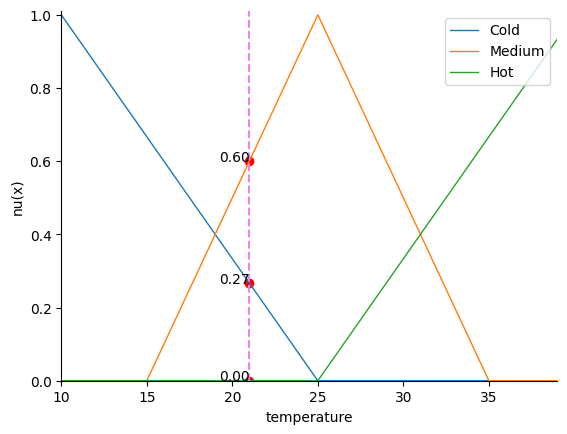

In [83]:
# Otra forma de definir las funciones de pertenencia, especificando los puntos de corte
v_temperature["Cold"] = fuzz.trimf(v_temperature.universe, (10, 10, 25)) # universe es todos los valores posibles (0, 26, 1)
v_temperature["Medium"] = fuzz.trimf(v_temperature.universe, (15, 25, 35))
v_temperature["Hot"] = fuzz.trimf(v_temperature.universe, (25, 40, 40))
v_temperature.view()

# Calcula los valores de las funciones de membresía en x=21
x_value = 21
cold_value = fuzz.trimf(np.array([x_value]), (10, 10, 25))
medium_value = fuzz.trimf(np.array([x_value]), (15, 25, 35))
hot_value = fuzz.trimf(np.array([x_value]), (25, 40, 40))

# Dibuja los puntos de corte en la gráfica
plt.scatter([x_value, x_value, x_value], [cold_value, medium_value, hot_value], color='red')

# Dibuja los valores de las funciones de membresía en la gráfica
plt.text(x_value, cold_value[0], f'{cold_value[0]:.2f}', ha='right')
plt.text(x_value, medium_value[0], f'{medium_value[0]:.2f}', ha='right')
plt.text(x_value, hot_value[0], f'{hot_value[0]:.2f}', ha='right')


plt.axvline(x=21, color='violet', linestyle='--')
plt.ylabel('nu(x)')
plt.legend(loc='upper right')
plt.show()

c:\Users\G513\University\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


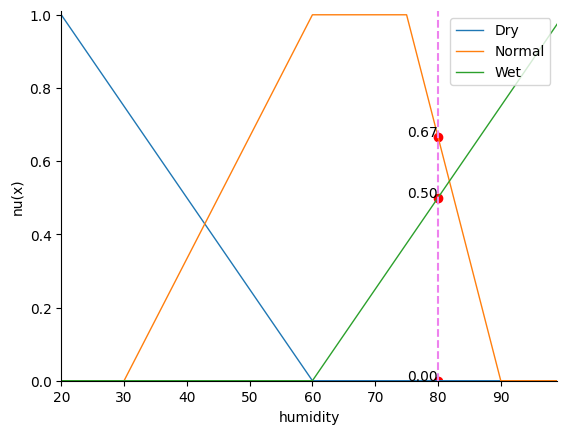

In [85]:
# Otra forma de definir las funciones de pertenencia, especificando los puntos de corte
v_humidity["Dry"] = fuzz.trimf(v_humidity.universe, (20, 20, 60)) # universe es todos los valores posibles (0, 26, 1)
v_humidity["Normal"] = fuzz.trapmf(v_humidity.universe, [30, 60, 75, 90])
v_humidity["Wet"] = fuzz.trimf(v_humidity.universe, (60, 100, 100))
v_humidity.view()
# Calcula los valores de las funciones de membresía en x=21
x_value = 80
dry_value = fuzz.trimf(np.array([x_value]), (20, 20, 60))
normal_value = fuzz.trapmf(np.array([x_value]), [30, 60, 75, 90])
wet_value = fuzz.trimf(np.array([x_value]), (60, 100, 100))

# Dibuja los puntos de corte en la gráfica
plt.scatter([x_value, x_value, x_value], [dry_value, normal_value, wet_value], color='red')

# Dibuja los valores de las funciones de membresía en la gráfica
plt.text(x_value, dry_value[0], f'{dry_value[0]:.2f}', ha='right')
plt.text(x_value, normal_value[0], f'{normal_value[0]:.2f}', ha='right')
plt.text(x_value, wet_value[0], f'{wet_value[0]:.2f}', ha='right')

plt.axvline(x=80, color='violet', linestyle='--')
plt.ylabel('nu(x)')
plt.legend(loc='upper right')
plt.show()

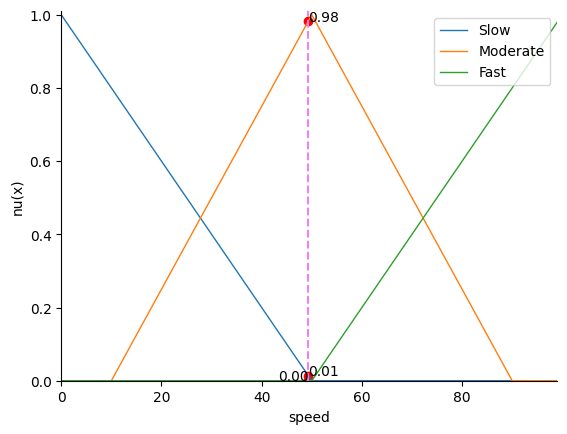

In [89]:
# Otra forma de definir las funciones de pertenencia, especificando los puntos de corte
v_speed["Slow"] = fuzz.trimf(v_speed.universe, (0, 0, 50)) # universe es todos los valores posibles (0, 26, 1)
v_speed["Moderate"] = fuzz.trimf(v_speed.universe, (10, 50, 90))
v_speed["Fast"] = fuzz.trimf(v_speed.universe, (50, 100, 100))
v_speed.view()

# Calcula los valores de las funciones de membresía en x=49.31
x_value = 49.31
slow_value = fuzz.trimf(np.array([x_value]), (0, 0, 50))
moderate_value = fuzz.trimf(np.array([x_value]), (10, 50, 90))
fast_value = fuzz.trimf(np.array([x_value]), (50, 100, 100))

# Dibuja los puntos de corte en la gráfica
plt.scatter([x_value, x_value, x_value], [slow_value, moderate_value, fast_value], color='red')

# Dibuja los valores de las funciones de membresía en la gráfica
plt.text(x_value, slow_value[0], f'{slow_value[0]:.2f}', ha='left')
plt.text(x_value, moderate_value[0], f'{moderate_value[0]:.2f}', ha='left')
plt.text(x_value, fast_value[0], f'{fast_value[0]:.2f}', ha='right')

plt.ylabel('nu(x)')
plt.legend(loc='upper right')
plt.axvline(x=49.31, color='violet', linestyle='--')
plt.show()

In [56]:
## Base de conocimiento

# Si la temperatura es fría y la humedad es alta, entonces la velocidad es baja
regla1 = ctrl.Rule(v_temperature["Cold"] | v_humidity["Wet"], v_speed["Slow"]) # "|" es conjunción "," implicación

# Si la temperatura es media y la humedad es alta, entonces la velocidad es baja
regla2 = ctrl.Rule(v_temperature["Medium"] | v_humidity["Wet"], v_speed["Slow"])

# Si la temperatura es fría y la humedad es media, entonces la velocidad es baja
regla3 = ctrl.Rule(v_temperature["Cold"] | v_humidity["Normal"], v_speed["Slow"])

# Si la temperatura es fría y la humedad es baja, entonces la velocidad es moderada
regla4 = ctrl.Rule(v_temperature["Cold"] | v_humidity["Dry"], v_speed["Moderate"])

# Si la temperatura es media y la humedad es baja, entonces la velocidad es moderada
regla5 = ctrl.Rule(v_temperature["Medium"] | v_humidity["Normal"], v_speed["Moderate"])

# Si la temperatura es media y la humedad es alta, entonces la velocidad es moderada
regla6 = ctrl.Rule(v_temperature["Hot"] | v_humidity["Wet"], v_speed["Moderate"])

# Si la temperatura es caliente y la humedad es alta, entonces la velocidad es moderada
regla7 = ctrl.Rule(v_temperature["Medium"] | v_humidity["Dry"], v_speed["Fast"])

# Si la temperatura es caliente y la humedad es media, entonces la velocidad es alta
regla8 = ctrl.Rule(v_temperature["Hot"] | v_humidity["Normal"], v_speed["Fast"])

# Si la temperatura es caliente y la humedad es baja, entonces la velocidad es alta
regla9 = ctrl.Rule(v_temperature["Hot"] | v_humidity["Dry"], v_speed["Fast"])

# regla1.view()

In [57]:
motor_de_inferencias =  ctrl.ControlSystem([
    regla1,
    regla2,
    regla3,
    regla4,
    regla5,
    regla6,
    regla7,
    regla8,
    regla9,
])

In [58]:
def calcula_inferencia_speed(
    t: float, # los ":" es el tipo, y el "=" es el valor por defecto
    h: float, 
    mi: ctrl.ControlSystem = motor_de_inferencias
) -> Tuple[ctrl.ControlSystemSimulation, float]:
    # Es necesario crear un objeto `ControlSystemSimulation` para simular el sistema de control para que realice la inferencia
    # raise es para dar un error para no dejar el código sin completar
    speed_infer = ctrl.ControlSystemSimulation(mi)

    speed_infer.input["temperature"]=t
    speed_infer.input["humidity"]=h

    speed_infer.compute() # Para calcular el valor de la propina

    return speed_infer, speed_infer.output["speed"]

In [59]:
calcula_inferencia_speed(t= 18, h=60)

(<skfuzzy.control.controlsystem.ControlSystemSimulation at 0x1ee8e1fc050>,
 49.31209058581319)

Speed: 49.31


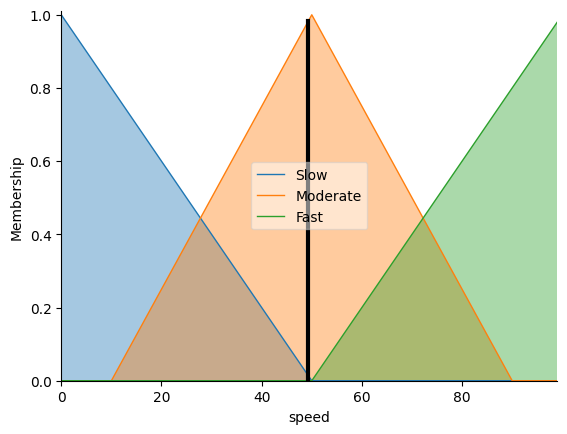

In [60]:
infer, speed = calcula_inferencia_speed(t=18, h=60)

print(f"Speed: {speed:.2f}")
v_speed.view(sim=infer)

In [106]:

# Define las etiquetas de las funciones de membresía para la temperatura y la humedad
temperature_labels = ["Cold(0,27)", "Medium(0,60)", "Hot(0)"]
humidity_labels = ["Dry(0)", "Normal(0,67)", "Wet(0,5)"]

# Define las reglas
rules = [
    ["Moderate", "Fast", "Fast"],
    ["Slow", "Moderate", "Fast"],
    ["Slow", "Slow", "Moderate"]
]

# Crea un MultiIndex para las columnas
columns = pd.MultiIndex.from_product([['Temperature'], temperature_labels])

# Crea un MultiIndex para las filas
index = pd.MultiIndex.from_product([['Humidity'], humidity_labels])

# Crea un DataFrame de pandas con las reglas
rules_df = pd.DataFrame(rules, columns=columns, index=index)

# Función para aplicar colores a las celdas
def highlight_cells(data):
    accept_color = 'background-color: yellow; color: black'
    reject_color = 'background-color: red; color: black'
    most_accepted_color = 'background-color: green; color: black'

    df_color = pd.DataFrame('', index=data.index, columns=data.columns)
    df_color.iloc[1, 0] = accept_color
    df_color.iloc[1, 1] = most_accepted_color
    df_color.iloc[1, 2] = reject_color
    df_color.iloc[2, 0] = accept_color
    df_color.iloc[2, 1] = accept_color
    df_color.iloc[2, 2] = reject_color
    df_color.iloc[0, 0] = reject_color
    df_color.iloc[0, 1] = reject_color
    df_color.iloc[0, 2] = reject_color

    return df_color

# Aplica los colores y muestra el DataFrame
styled_df = rules_df.style.apply(highlight_cells, axis=None)

# Define los estilos CSS para centrar los encabezados
header_props = [
  ('text-align', 'center')
]

# Aplica los estilos CSS
styled_df.set_table_styles([
   dict(selector="th", props=header_props)
])